In [2]:
#soru_1
#Sınav sonuçları normal dağılımlı mıdır? 
#Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [5]:
stperform = pd.read_csv('C:\\Users\\User\\Desktop\\StudentsPerformance.csv')
stperform.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']

stperform.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


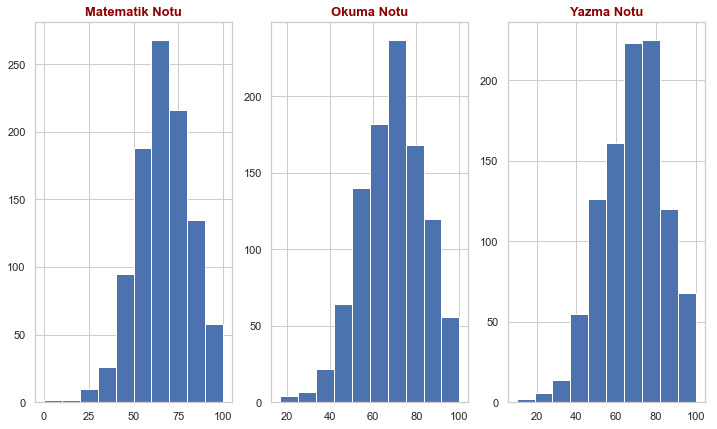

In [6]:
#Notların histogramla normal dağılıp dağılmadığına bakalım.

plt.figure(figsize = (12,7))
plt.subplot(1,3,1)
plt.hist(stperform['matematik_notu'])
plt.title('Matematik Notu', fontdict = baslik_font)
plt.subplot(1,3,2)
plt.hist(stperform['okuma_notu'])
plt.title('Okuma Notu', fontdict = baslik_font)
plt.subplot(1,3,3)
plt.hist(stperform['yazma_notu'])
plt.title('Yazma Notu', fontdict = baslik_font)
plt.show()

#Grafiklerden notların normal dağılıma uygun gibi görünüyor.

In [7]:
#Normal dağılıma uyduğundan emin olmak için normallik testi yapalım.

from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

puanlar = ["matematik_notu", "okuma_notu", "yazma_notu"]
dagilim_testleri = pd.DataFrame(columns=['puanlar', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for puan in puanlar:
    jb_stats = jarque_bera(stperform[puan])
    norm_stats = normaltest(stperform[puan])
    dagilim_testleri = dagilim_testleri.append({"puanlar": puan,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri


#notlar sanıldığı kadar normal değil. p değeri 0,05'ten küçük 

,puanlar,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,matematik_notu,15.91226,0.00035,15.40896,0.00045
1,okuma_notu,11.38330,0.00337,11.11741,0.00385
2,yazma_notu,13.98509,0.00092,13.60645,0.00111


In [26]:
#notları normalleştirelim
from scipy.stats import jarque_bera
from scipy.stats import boxcox
from sklearn.preprocessing import normalize

norm1=normalize(np.array(stperform['okuma_notu']).reshape(1,-1)).reshape(-1,1)

norm2=normalize(np.array(stperform['yazma_notu']).reshape(1,-1)).reshape(-1,1)

math=stperform['matematik_notu'].replace(0,np.nan)
math=math.dropna()
math=np.array(math)


read,_ = boxcox(norm1)
writing,_=boxcox(norm2)
math,_=boxcox(math)

normed1=jarque_bera(read)
normed2=jarque_bera(writing)
normed3=jarque_bera(math)

print (normed1)
print (normed2)
print (normed3)
# p değerleri 0,05'ten büyük normalleştirildi.

(4.119778184631267, 0.12746810630338878)
(4.746478444500504, 0.09317841132652582)
(1.7200980667409385, 0.4231413337632879)


In [27]:
#soru_2
#Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. 
#Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. 
#Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. 
#Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

stperform['ort_not'] = (stperform['matematik_notu'] + stperform['okuma_notu'] + stperform['yazma_notu'])/3
stperform['ort_not'].head()



0   72.66667
1   82.33333
2   92.66667
3   49.33333
4   76.33333
Name: ort_not, dtype: float64

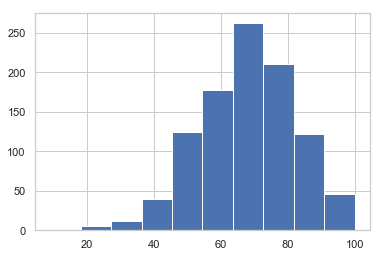

In [28]:
plt.hist(stperform['ort_not'])
plt.show()

In [29]:
normaltest(stperform['ort_not'])  #normal dağılıma sahip değil

NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)

In [37]:
from scipy.stats import jarque_bera
from scipy.stats import boxcox
from sklearn.preprocessing import normalize

normort=normalize(np.array(stperform['ort_not']).reshape(1,-1)).reshape(-1,1)
ort_not,_ = boxcox(normort)
norm_ortnot=jarque_bera(ort_not)
print(norm_ortnot)

#ortlama not normalleştirildi.

(2.435398821322927, 0.2959101521819576)


In [38]:
#soru_3
#Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? 
#Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

stperform.corr()

,matematik_notu,okuma_notu,yazma_notu,norm_read,norm_writing,ort_not,log_ort_not
matematik_notu,1.00000,0.81758,0.80264,0.81758,0.80264,0.91875,0.89910
okuma_notu,0.81758,1.00000,0.95460,1.00000,0.95460,0.97033,0.94291
yazma_notu,0.80264,0.95460,1.00000,0.95460,1.00000,0.96567,0.94149
norm_read,0.81758,1.00000,0.95460,1.00000,0.95460,0.97033,0.94291
norm_writing,0.80264,0.95460,1.00000,0.95460,1.00000,0.96567,0.94149
ort_not,0.91875,0.97033,0.96567,0.97033,0.96567,1.00000,0.97508
log_ort_not,0.89910,0.94291,0.94149,0.94291,0.94149,0.97508,1.00000


In [39]:
ttest_cinsiyet = stats.ttest_ind(stperform[stperform['cinsiyet'] == 'male']['ort_not'],
                                stperform[stperform['cinsiyet'] == 'female']['ort_not'])
ttest_hazirlik = stats.ttest_ind(stperform[stperform['hazirlik_kursu'] == 'none']['ort_not'],
                                stperform[stperform['hazirlik_kursu'] == 'completed']['ort_not'])
ttest_yemek = stats.ttest_ind(stperform[stperform['ogle_yemegi'] == 'free/reduced']['ort_not'],
                                stperform[stperform['ogle_yemegi'] == 'standard']['ort_not'])

print(ttest_cinsiyet)
print(ttest_hazirlik)
print(ttest_yemek)

#p değerleri çok küçük istatistik anlamlı cinsiyet, hazırlık kursu ve öğle yemeği ortalama not üzerinde etkili.
#Bu değerleri veri kümesinde tutumak mantıklı.

Ttest_indResult(statistic=-4.169913529142, pvalue=3.311973638243664e-05)
Ttest_indResult(statistic=-8.390944443482592, pvalue=1.633780203592351e-16)
Ttest_indResult(statistic=-9.575113051511476, pvalue=7.736791812495384e-21)


In [42]:
koken = stperform["koken"].unique()
grup_stperform = stperform.groupby("koken")
pd.options.display.float_format = '{:.15f}'.format
for var in ["ort_not"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(etnikkoken)):
        for j in range(i+1, len(etnikkoken)):
            ttest = stats.ttest_ind(stperform[stperform["koken"]==etnikkoken[i]][var], 
                                stperform[stperform["koken"]==etnikkoken[j]][var])
            grup_1 = koken[i]
            grup_2 = koken[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)
    
    #etnik köken için p değerlerine baktığımızda bazı gruplar için anlamsız.

ort_not için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.278246741583154,0.201747312277340
1,group B,group A,1.316504366963353,0.189093058950944
2,group B,group D,-2.803108399207725,0.005279949204375
3,group B,group E,-4.460378072613960,0.000011254806794
4,group C,group A,2.466593204095108,0.014052604831601
5,group C,group D,-1.806357695360095,0.071381586738136
6,group C,group E,-3.935868946604548,0.000095801993351
7,group A,group D,-3.717941592338664,0.000233904167488
8,group A,group E,-4.958668289961606,0.000001389791047
9,group D,group E,-2.487048058580620,0.013287580176112
